# C4 Detection Training Data

This file generates the training data for the C4 detection project led by Dr. Wenli Huang. You need two things to generate the training data:

* 8 images per sample, one image for each of the 8 wavelengths
* A mask for the images. The mask separates the explosive chemical from the background material. The mask should be saved as `mask.j2` in the sample folder. 

This notebook builds vectors from each cooresponding vector in the images and labels each one based on the mask. The output is a numpy array with 9 columns. The first 8 columns are the intensities of the 8 wavelengths for that pixel. The 9th column is whether this vector represents an explosive chemical or not. 

## Dependencies

The images are JPEG-2000 files. You will need to install OpenJPEG, such as the `libjpeg` package for OS X. 

## Generating masks

We are currently using [GIMP](www.gimp.org) to build the masks. Ideally we'd have too many samples to manually build masks, so you could imagine using [computer vision](https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html) to do it programmatically. 

In [140]:
import os
import glob
import skimage
from skimage import io

We'll add the vectors from each sample to vectors array as we process them. 

In [ ]:
vectors = []

These are the unix globs for the each sample. Each glob should return exactly 8 images. If you are looking to rebuild the training for a particular sample, just comment out the others. 

In [ ]:
SAMPLE_PATHS = [
    #"C4 chunk/*-1.jp2",
    #"DSYP60-not-C4/*I0000*.jp2",
    #"50ug-SamariumNitroate-Not-C4/*-1.jp2",
    #"2014-01-17_09.36.05/*I0000*.jp2",
    "2014-01-17_09.43.08/*I0000*.jp2",
    #"2014-01-17_09.54.47/*I0000*.jp2",
    #"2014-01-17_09.57.19/*I0000*.jp2",
    #"2014-01-17_10.04.23/*I0000*.jp2"
]

Read images, build vectors, read mask, append labels. The vector are saved as serialized numpy arrays to their respective sample folders. 

In [ ]:
for sample in SAMPLE_PATHS:
    images = []
    
    for filename in sorted(glob.glob(sample)):
        images.append(io.imread(filename))
    
    dirname = os.path.dirname(sample)
    mask = io.imread(os.path.join(dirname,"mask.jp2"))
    labels = mask == 0
    
    images.append(labels)
    training = np.stack(images,axis=-1).reshape(-1,len(images))
    
    np.save(os.path.join*(dirname("training.npy"),training)

## Debugging

If you want to highlight certain pixels, you build a mask and overlay that on your image. Here's an example of doing that.

In [148]:
from skimage import data
from matplotlib import pyplot as plt

Grab an image.

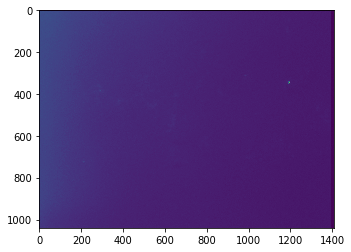

In [155]:
filename = sorted(glob.glob(SAMPLE_PATHS[0]))[0]
image = skimage.io.imread(filename)
plt.imshow(image)

Create a mask. You need a numpy array the same shape as your image. I will build a mask using one of the mask files. 

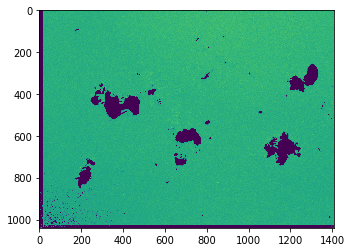

In [157]:
dirname = os.path.dirname(filename)
mask_filename = os.path.join(dirname,"mask.jp2")
mask_image = io.imread(mask_filename)
plt.imshow(mask_image)

The actual mask is a boolean value corresponding to every pixel in the original image. Let's just create a mask where every pixel in the mask file is zero. 

In [159]:
mask = mask_image == 0
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Now apply the mask to the original image. We'll make the mask overlay green. That means we'll need to convert the grayscale image to RGB.

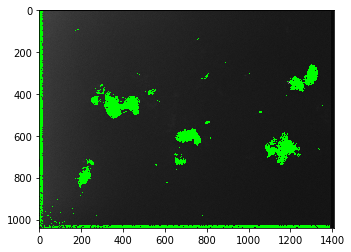

In [161]:
color = skimage.color.gray2rgb(image)
color[mask] = (0,255,0)
plt.imshow(color)